In [98]:
import keras
from keras.datasets import boston_housing
from keras.layers import Activation, Dense, Dropout, Input
from keras.models import Sequential, Model
from keras.optimizers import RMSprop, Adam
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

In [214]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [281]:
batch_size = 8
epochs = 5

In [282]:
inputs = Input(shape=(13,))
node = Dense(512, activation='relu')(inputs)
# node = Dropout(0.2)(node)
node = Dense(512, activation='relu')(node)
# node = Dropout(0.2)(node)
node = Dense(1)(node)

model = Model(inputs=inputs, outputs=node)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        (None, 13)                0         
_________________________________________________________________
dense_190 (Dense)            (None, 512)               7168      
_________________________________________________________________
dense_191 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_192 (Dense)            (None, 1)                 513       
Total params: 270,337
Trainable params: 270,337
Non-trainable params: 0
_________________________________________________________________


In [186]:
class BostonRegressionModel(keras.Model):
    def __init__(self):
        super(BostonRegressionModel, self).__init__(name='mlp')
        
        self.nodes = [
            Dense(512, activation='relu'),
            Dropout(0.2),
            Dense(512, activation='relu'),
            Dropout(0.2),
            Dense(1)
        ]
        
    def call(self, inputs):
        x = inputs
        for node in self.nodes:
            x = node(x)
            
        return x

In [187]:
model = BostonRegressionModel()

In [283]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mse'])

In [284]:
kf = KFold(n_splits=10)
fold = 0
for train, test in kf.split(x_train, y_train):
    print('Processing fold ', fold)
    fold += 1
    history = model.fit(x_train[train], y_train[train], 
                        batch_size=batch_size, 
                        epochs=epochs, 
                        verbose=0, 
                        validation_data=(x_train[test], y_train[test]))

Processing fold  0
Processing fold  1
Processing fold  2
Processing fold  3
Processing fold  4
Processing fold  5
Processing fold  6
Processing fold  7
Processing fold  8
Processing fold  9


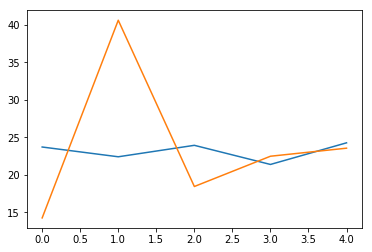

In [285]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [286]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 30.21760274849686
Test accuracy: 30.21760274849686
